In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins = pd.read_csv("datasets/penguins_regression.csv")
penguins.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


Text(0.5, 1.0, 'Body Mass as a function of the Flipper Length')

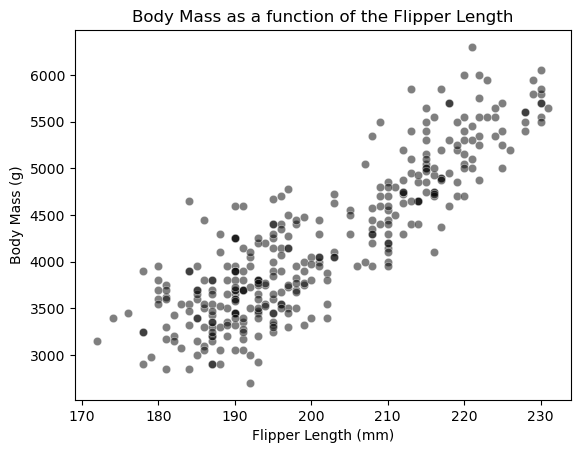

In [3]:
feature_column = "Flipper Length (mm)"
target_column = "Body Mass (g)"
X, y = penguins[[feature_column]], penguins[target_column]

ax = sns.scatterplot(
    data=penguins, x=feature_column, y=target_column, color="black", alpha=0.5
)
ax.set_title("Body Mass as a function of the Flipper Length")

In [4]:
def linear_model_flipper_mass(flipper_length, weight_flipper_length, intercept_body_mass):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

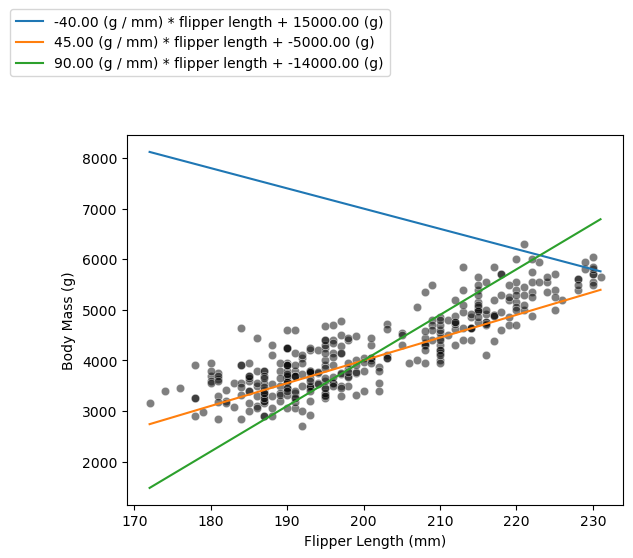

In [5]:
flipper_length_range = np.linspace(X.min(), X.max(), num=300)

weights = [-40, 45, 90]
intercepts = [15000, -5000, -14000]

ax = sns.scatterplot(
    data=penguins, x=feature_column, y=target_column, color="black", alpha=0.5
)

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"
for weight, intercept in zip(weights, intercepts):
    predicted_body_mass = linear_model_flipper_mass(
        flipper_length_range, weight, intercept
    )

    ax.plot(
        flipper_length_range,
        predicted_body_mass,
        label=label.format(weight, intercept),
    )
_ = ax.legend(loc="center left", bbox_to_anchor=(-0.25, 1.25), ncol=1)

In [6]:
def goodness_fit_measure(true_values, predictions):
    # we compute the error between the true values and the predictions of our
    # model
    errors = np.ravel(true_values) - np.ravel(predictions)
    # We have several possible strategies to reduce all errors to a single value.
    # Computing the mean error (sum divided by the number of element) might seem
    # like a good solution. However, we have negative errors that will misleadingly
    # reduce the mean error. Therefore, we can either square each
    # error or take the absolute value: these metrics are known as mean
    # squared error (MSE) and mean absolute error (MAE). Let's use the MAE here
    # as an example.
    return np.mean(np.abs(errors))

In [7]:
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    y_predicted = linear_model_flipper_mass(X, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(y, y_predicted):.3f}\n")

Model #0:
-40.00 (g / mm) * flipper length + 15000.00 (g)
Error: 2764.854

Model #1:
45.00 (g / mm) * flipper length + -5000.00 (g)
Error: 338.523

Model #2:
90.00 (g / mm) * flipper length + -14000.00 (g)
Error: 573.041

